# Photometry and Colors
use with the packet https://www.colour-science.org/.





## Geometry: Solid Angle and Steradian

Calculation of the solid angle from the cone's opening angle:

$\Omega = 2\pi \times (1 - \cos(\alpha / 2))$

and vice versa,

$\alpha = 2 \times \arccos\left(1 - \frac{\Omega}{2\pi}\right)$

where the angle values are given in steradians (solid angle in the range of 0 to $4\pi$) and radians.

<div>
    Definition of the solid angle
<img src="raumwinkel_kegel.png" width="300"/>
</div>


Ein Steradiant hat einen Kegelöffnungswinkel von 65.5411°


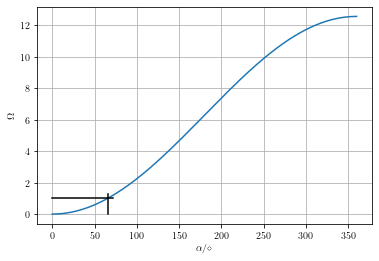

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
alpha=np.linspace(0,2*np.pi,500)
plt.plot(alpha*180/np.pi,2*np.pi*(1-np.cos(alpha/2)))
plt.xlabel(r"$\alpha/\circ$")
plt.ylabel(r"$\Omega$")
plt.grid("both")

a0=np.arccos(1-1/(2*np.pi))*2.0*180/np.pi
plt.plot([a0,a0],[0,1.3],"k-")
plt.plot([0,a0*1.1],[1,1],"k-")

print(r"Ein Steradiant hat einen Kegelöffnungswinkel von %5.4f°"% (a0))


## Lambertian Emitter

A Lambertian emitter has an intensity distribution given by:
$I(\theta) = I_0 \cos(\theta)$

With the geometric consideration that $x = \sin(\theta)$ and $y = \cos(\theta)$, one can plot the diagram accordingly.


6.000000000000001
Halber Öffnungswinkel (halbe Intensität) ist 10.0000°


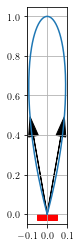

In [2]:
w=10 #65.5411/2 ## Halber Öffnungswinkel!
a=1/w*180/np.pi*np.arccos(0.5)
print(a)
th=np.linspace(-np.pi/2/a,np.pi/2/a,200)
x=th.copy()
y=th.copy()
for ii,t in enumerate(th):
    x[ii]=np.sin(t)*np.cos(a*t)
    y[ii]=np.cos(t)*np.cos(a*t)

fig, ax = plt.subplots()
plt.plot(x,y)
ax=plt.gca()
ax.set_aspect('equal')
plt.grid("both")

# Create a Rectangle patch
import matplotlib.patches as patches
rect = patches.Rectangle((-0.05, 0), 0.1, -0.03, linewidth=1, edgecolor='r', facecolor='r')
ax.add_patch(rect)
w=1/a*np.arccos(0.5)
ax.arrow(0, 0, np.sin(w)*np.cos(a*w), np.cos(w)*np.cos(a*w), head_width=0.05, head_length=0.1, fc='k', ec='k',length_includes_head=True)
ax.arrow(0, 0, -np.sin(w)*np.cos(a*w), np.cos(w)*np.cos(a*w), head_width=0.05, head_length=0.1, fc='k', ec='k',length_includes_head=True)
print("Halber Öffnungswinkel (halbe Intensität) ist %5.4f°"% (1/a*np.arccos(0.5)*180/np.pi))

<IPython.core.display.Javascript object>


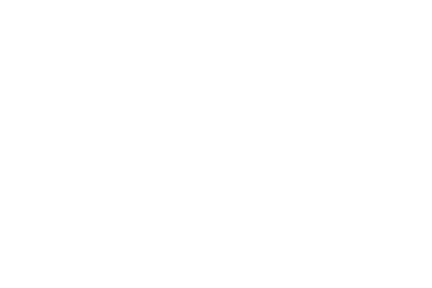

<IPython.core.display.Javascript object>


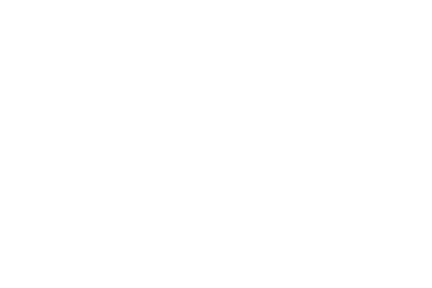

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
w=25 #65.5411/2 ## Halber Öffnungswinkel!
a=1/w*180/np.pi*np.arccos(0.5)
th=np.linspace(-np.pi/2/a,np.pi/2/a,100)
t1,t2=np.meshgrid(th,th)
X = np.sin(t1)*np.cos(a*t1)*np.cos(t2)*np.cos(a*t2)
Y = np.cos(t1)*np.cos(a*t1)*np.sin(t2)*np.cos(a*t2)
Z = np.cos(t1)*np.cos(a*t1)*np.cos(t2)*np.cos(a*t2)

from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.Reds,
                       linewidth=0, antialiased=False)
ax.set_xlim(-1, 1.)
ax.set_ylim(-1, 1.)
ax.set_zlim(0, 1.)


#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#ax = Axes3D(fig)
x = [-0.05,0.05,0.05,-0.05]
y = [-0.05,-0.05,0.05,0.05]
z = [0,0,0.0,0.0]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts,facecolors="red"))

plt.show()

## The Visible Spectrum

First, let's display the visible spectrum. What appears black here would still be visible to our eyes if the monitor could represent it. This includes both shorter-wavelength violet and longer-wavelength red light.

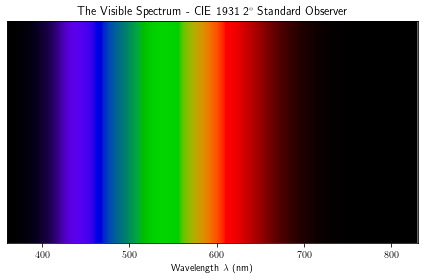

In [4]:
%matplotlib inline
import colour # pip install colour colour-science
colour.plotting.plot_visible_spectrum();

## Sensitivity of the Eyes

For something like brightness, the ability to perceive light is not solely determined by the power of the electromagnetic radiation but also by the sensitivity of our eyes. This sensitivity varies between day and night, leading to a distinction between photopic vision (daytime vision) and scotopic vision (nighttime vision).

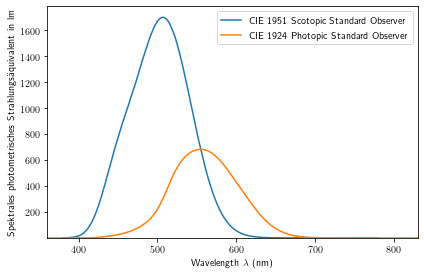

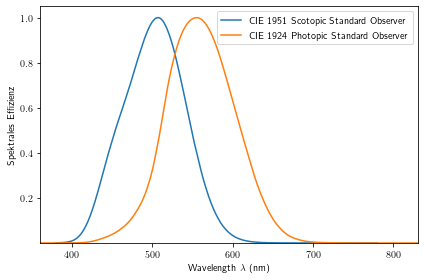

Maximalwert des photometrischen Strahlungsäquivalents 

Photopisch (Tag)   K_m= 683.0000lm/W
Sktopisch (Nacht) K'_m=1700.0000lm/W


In [5]:
from colour.plotting import *
sd_mesopic_luminous_efficiency_function = (
    colour.sd_mesopic_luminous_efficiency_function(0.2)
)

plot_multi_sds(
    (
        colour.colorimetry.SDS_LEFS_SCOTOPIC["CIE 1951 Scotopic Standard Observer"]*colour.constants.CONSTANT_KP_M,
        colour.colorimetry.SDS_LEFS_PHOTOPIC["CIE 1924 Photopic Standard Observer"]*colour.constants.CONSTANT_K_M,
    ),
    y_label="Spektrales photometrisches Strahlungsäquivalent in lm",
    legend_location="upper right",
)

plot_multi_sds(
    (
        colour.colorimetry.SDS_LEFS_SCOTOPIC["CIE 1951 Scotopic Standard Observer"],
        colour.colorimetry.SDS_LEFS_PHOTOPIC["CIE 1924 Photopic Standard Observer"],
    ),
    y_label="Spektrales Effizienz",
    legend_location="upper right",
)


print("Maximalwert des photometrischen Strahlungsäquivalents \n")
print("Photopisch (Tag)   K_m= %5.4flm/W"% colour.constants.CONSTANT_K_M)
print("Sktopisch (Nacht) K'_m=%5.4flm/W"% colour.constants.CONSTANT_KP_M)


## Different Simple Sources of Radiation

Here, various radiation sources are considered. In the first step, we have:

1. A monochromatic source
1. Different LEDs

You can modify the parameters of these sources, particularly the central wavelength (the first parameter in the "sd_single_led" call) and the spectral width (the second parameter). The LEDs will be normalized such that their total power is 1W.

Lichtstrom monochromatisches Licht LED 683.0000lm/W
Lichtstrom rote LED 428.3985lm/W
Lichtstrom grüne LED 650.5274lm/W
Lichtstrom blaue LED 30.8936lm/W


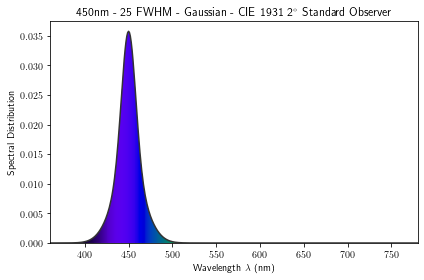

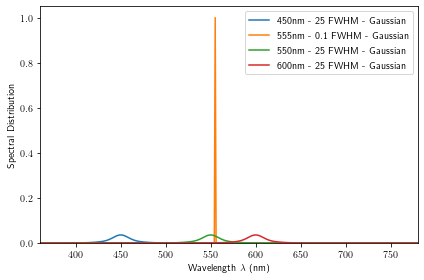

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f202289d5b0>)

In [6]:
import numpy as np
# Bestimmen einer monochromaten Quelle, Vorsicht: Es müssen immer 6 datenpunkte angegeben werden
sl_sd=colour.colorimetry.SpectralDistribution({553.0:0,554.0:0,555.0: 1,556.0: 1,557.0:0,558.0:0})
sl2_sd=colour.colorimetry.SpectralDistribution({553.0:0,554.0:0,555.0: 1,556.0: 0,557.0:0,558.0:0})
#print(colour.luminous_flux(sl_sd))

# Monochromatisch, mache die Bandbreite sehr klein, dann geht das mit der Routine für
# die LED
led1_sd = colour.sd_single_led(555, 0.1)

# Erzeuge Spectren für verschiedene LED und normiere sie auf Leistung 1
led_blau_sd = colour.sd_single_led(450, 25)
s=np.sum(led_blau_sd.values)
led_blau_sd.values=led_blau_sd.values/s
led_gruen_sd = colour.sd_single_led(550, 25)
s=np.sum(led_gruen_sd.values)
led_gruen_sd.values=led_gruen_sd.values/s
led_rot_sd = colour.sd_single_led(600, 25)
s=np.sum(led_rot_sd.values)
led_rot_sd.values=led_rot_sd.values/s

print("Lichtstrom monochromatisches Licht LED %5.4flm/W"% colour.luminous_flux(led1_sd))
print("Lichtstrom rote LED %5.4flm/W"% colour.luminous_flux(led_rot_sd))
print("Lichtstrom grüne LED %5.4flm/W"% colour.luminous_flux(led_gruen_sd))
print("Lichtstrom blaue LED %5.4flm/W"% colour.luminous_flux(led_blau_sd))
plot_single_sd(led_blau_sd)
colour.plotting.plot_multi_sds(colour.colorimetry.sds_and_msds_to_msds(
    [led_blau_sd,led1_sd,led_gruen_sd,led_rot_sd]))

### Blackbody Radiator

Here, the blackbody radiator is introduced. It is an object that has reached a certain temperature and now emits electromagnetic radiation. The blackbody radiator is an idealized model for objects like the Sun or incandescent light bulbs. The total radiated power is given by:

$P = \sigma AT^4$

where $\sigma = 5.670374419 \times 10^{-8}$ W/(m²K⁴) is the Stefan-Boltzmann constant, and $A$ and $T$ represent the surface area and temperature in Kelvin, respectively. For comparison purposes, the power of the entire radiator, including the invisible spectrum, is normalized to 1W or 1W/m².

You can also modify the temperature here, with typical values being 5500K for the Sun or 2000-3000K for an incandescent light bulb. Compare the efficiency in lm/W of the source and compare it with LEDs.


Lichtstrom eines Schwarzen Strahlers mit T=4000K ist 17.4137lm/W
Die Leistung im betrachteten Bereich ist 0.09268W


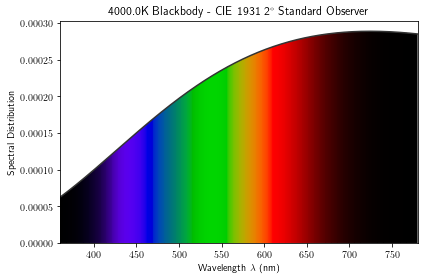

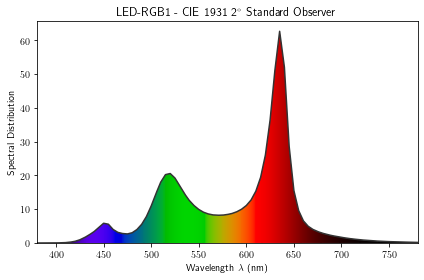

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2048d07430>)

In [7]:
T=4000.0

# Bestimme die Gesamtleistung des Schwarzen Strahlers, um hinterher richtig normieren
# zu können
sbk=5.670374419e-8 # Stefan Boltzmann Konstante
A=1 # Fläche
P = sbk * A * T**4.0 # Strahlungsgesetz ()
bb=colour.sd_blackbody(T)
bb.values=bb.values/P
print("Lichtstrom eines Schwarzen Strahlers mit T=%3.0fK ist %5.4flm/W"% (T,colour.luminous_flux(bb)))
print("Die Leistung im betrachteten Bereich ist %5.4gW"% np.sum(bb.values))
plot_single_sd(bb)

# Eine Standardquelle
''' Mögliche Standardlichtquellen sind:
Siehe https://colour.readthedocs.io/en/develop/generated/colour.SDS_ILLUMINANTS.html
'A', 'B', 'C', 'D50', 'D55', 'D60', 'D65', 'D75', 'E', 'FL1', 'FL2',
'FL3', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'FL10', 'FL11',
'FL12', 'FL3.1', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7',
'FL3.8', 'FL3.9', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14',
'FL3.15', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'LED-B1', 'LED-B2',
'LED-B3', 'LED-B4', 'LED-B5', 'LED-BH1', 'LED-RGB1', 'LED-V1',
'LED-V2', 'ID65', 'ID50', 'ISO 7589 Photographic Daylight', 'ISO 7589
Sensitometric Daylight', 'ISO 7589 Studio Tungsten', 'ISO 7589
Sensitometric Studio Tungsten', 'ISO 7589 Photoflood', 'ISO 7589
Sensitometric Photoflood', 'ISO 7589 Sensitometric Printer'
'''
bb=colour.SDS_ILLUMINANTS["LED-RGB1"]
plot_single_sd(bb)

You can find more details about blackbody radiators here, such as the colors and the color impression of such objects.

Change the temperature to see the modified colors.

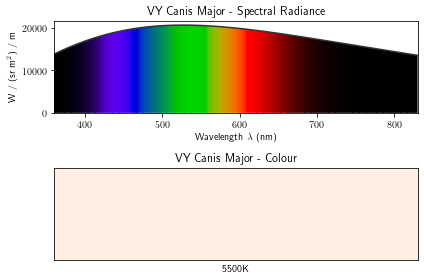

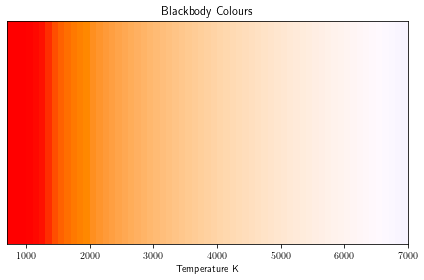

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2048e51340>)

In [8]:
plot_blackbody_spectral_radiance(5500, blackbody="VY Canis Major")
from colour.plotting import *
colour.plotting.plot_blackbody_colours(
    colour.colorimetry.spectrum.SpectralShape(700, 7000, 100))

## Colors

For color vision, the human eye has three different receptors that respond to different wavelengths of red, green, and blue light. These are shown below. The color impression can be expressed by three values X, Y, and Z (tristimulus), corresponding to the response of these receptors. These values are calculated, just like brightness, by integrating the observed spectrum with their respective functions. If the result is normalized so that $X + Y + Z = 1$, one of the values (usually Z) becomes redundant, and therefore, using only two values $x, y$ is sufficient.

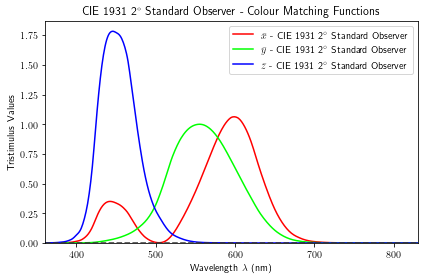

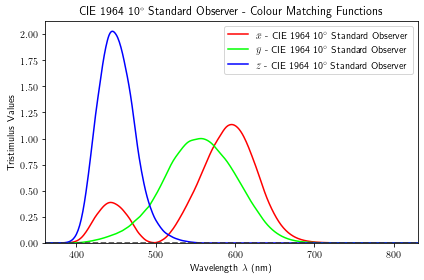

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2048dc7490>)

In [9]:
colour.plotting.plot_single_cmfs("CIE 1931 2 Degree Standard Observer")
colour.plotting.plot_single_cmfs("CIE 1964 10 Degree Standard Observer")

## The CIE Color Diagram

The CIE Color Diagram allows colors or spectral distributions to be located. Initially, only RGB colors are localized, represented by coordinates with values from 0 to 255 for Red, Green, and Blue. The RGB triangle represents only a subset of all possible colors, as monitors cannot produce monochromatic light.

Experiment with different RGB values (specified in the arrays) and locate them on the diagram. You may need to look very closely to find the exact location!


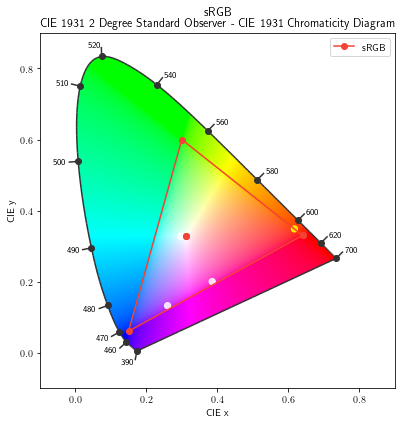

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2048cb7df0>)

In [10]:
import numpy as np
from colour.plotting import *

RGB = np.array([[200,250,255],[79, 2, 45],[80,5,150],[255,10,0]])
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB)

### Various Artificial Light Sources in the CIE Diagram

Examine the positions of different simple artificial light sources in the CIE diagram. For example, monochromatic sources (simply reduce the bandwidth start, e.g., 0.1) or LEDs, etc. Also, vary the mean wavelength.

Die Farbkoodinaten XYZ sind  [ 95.61845461  97.095921    99.57567897]
umgerechnet in xy haben wir  [0.32713550499953248, 0.33219030026956914, 0.34067419473089833]
und in RBG ist das  [ 110.97339635   93.60908649   90.76258725]
Die korellierte Farbtemperatur (CCT) ist  5761K


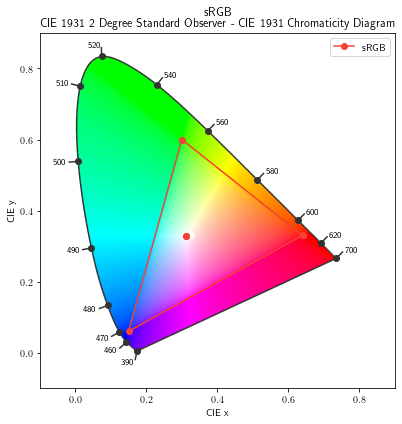

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20228046a0>)

In [11]:
sd = colour.sd_single_led(480, 1000)
#sd=colour.sd_blackbody(5500)
XYZ=colour.sd_to_XYZ(sd)
m=np.array([[ 3.24096994, -1.53738318, -0.49861076],
            [-0.96924364,  1.8759675 ,  0.04155506],
            [ 0.05563008, -0.20397696,  1.05697151]])
RGB=m.dot(XYZ)
xy=[XYZ[0]/np.sum(XYZ),XYZ[1]/np.sum(XYZ),1-(XYZ[0]+XYZ[1])/np.sum(XYZ)]
#RGB=colour.XYZ_to_RGB(XYZ)
print("Die Farbkoodinaten XYZ sind ", XYZ)
print("umgerechnet in xy haben wir ",xy)
print("und in RBG ist das ",RGB)
print("Die korellierte Farbtemperatur (CCT) ist %5.4gK"% 
      colour.temperature.xy_to_CCT_Hernandez1999(xy[0:2]))

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB,)

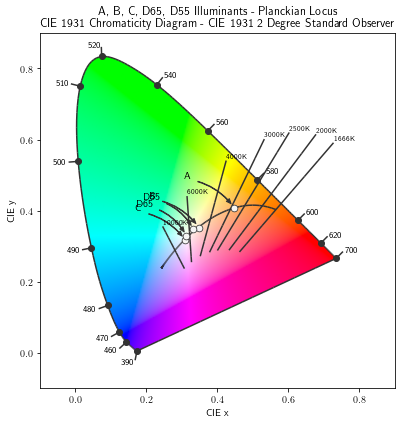

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2037783ac0>)

In [12]:
plot_planckian_locus_in_chromaticity_diagram_CIE1931(["A", "B", "C","D","D65","D55"])